Assignment 3 - 
Note that part 1 was taken from the assignment preprocessed data. This assignment will consist of the Logistic regression to analyze the data. Also had to change the scaling to come after the splitting.

# Semiconductor manufacturing process dataset

## Project Description
Source: https://www.kaggle.com/saurabhbagchi/fmst-semiconductor-manufacturing-project

A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of signals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning, and reduce per-unit production costs. These signals can be used as features to predict the yield type. And by analyzing and trying out different combinations of features, essential signals that are impacting the yield type can be identified.

Dataset: SemiconductorManufacturingProcessDataset.csv (on Canvas)

Later, we will learn how to apply PCA (Principal Component Analyses) for feature selection; then we will apply ANN to predict the Pass/Fail. in this exercise our objective is to repeat the same steps we did above for Supplier Data: Cleaning & Scaling Data, Encode Categorical Data, Split the Data to Training & Test Sets. 

## Importing the Libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the Dataset

In [7]:
dataset = pd.read_csv('SemiconductorManufacturingProcessDataset.csv')

## Showing the Dataset in a Table

In [9]:
pd.DataFrame(dataset)
#dataset

,Time,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,...,Sensor 429,Sensor 430,Sensor 431,Sensor 432,Sensor 433,Sensor 434,Sensor 435,Sensor 436,Sensor 437,Pass/Fail
0,7/19/2008 11:55,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,Pass
1,7/19/2008 12:32,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,Pass
2,7/19/2008 13:17,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,Fail
3,7/19/2008 14:43,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,Pass
4,7/19/2008 15:22,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,10/16/2008 15:13,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.3424,-0.0045,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,Pass
1563,10/16/2008 20:49,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.4333,-0.0061,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,Pass
1564,10/17/2008 5:26,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,NaN,NaN,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,Pass
1565,10/17/2008 6:01,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.4622,-0.0072,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,Pass


## A Quick Review of the Data

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 439 entries, Time to Pass/Fail
dtypes: float64(437), object(2)
memory usage: 5.2+ MB


## Seperate The Input and Output
Here, we put the independent variables in X and the dependent variable in y. 

In [13]:
X = dataset.iloc[:, 1:438].values
y = dataset.iloc[:, -1].values

## Showing the Input Data in a Table format

In [15]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,427,428,429,430,431,432,433,434,435,436
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,1.6765,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.3424,-0.0045,-0.0057,...,1.4879,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.4333,-0.0061,-0.0093,...,1.0187,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,NaN,NaN,NaN,...,1.2237,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.4622,-0.0072,0.0032,...,1.7085,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


## A Quick Check of the Output Data

In [17]:
pd.DataFrame(y)

,0
0,Pass
1,Pass
2,Fail
3,Pass
4,Pass
...,...
1562,Pass
1563,Pass
1564,Pass
1565,Pass


## Taking care of missing data

In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)

In [20]:
# A quick check
print(X)

[[3.03093000e+03 2.56400000e+03 2.18773330e+03 ... 1.64749042e-02
  5.28333333e-03 9.96700663e+01]
 [3.09578000e+03 2.46514000e+03 2.23042220e+03 ... 2.01000000e-02
  6.00000000e-03 2.08204500e+02]
 [2.93261000e+03 2.55994000e+03 2.18641110e+03 ... 4.84000000e-02
  1.48000000e-02 8.28602000e+01]
 ...
 [2.97881000e+03 2.37978000e+03 2.20630000e+03 ... 8.60000000e-03
  2.50000000e-03 4.35231000e+01]
 [2.89492000e+03 2.53201000e+03 2.17703330e+03 ... 2.45000000e-02
  7.50000000e-03 9.34941000e+01]
 [2.94492000e+03 2.45076000e+03 2.19544440e+03 ... 1.62000000e-02
  4.50000000e-03 1.37784400e+02]]


## Encoding Categorical Data

### Encoding the Independent Variable

In [23]:
# we don't have any categorical data

### Encoding the Dependent Variable

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [26]:
# a qucik check
print(y)

[1 1 0 ... 1 1 1]


## Splitting the Dataset into the Training set and Test set

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 34)

In [29]:
print(X_train)

[[2.9439000e+03 2.4366500e+03 2.1734556e+03 ... 1.5900000e-02
  4.8000000e-03 7.9775200e+01]
 [2.9500000e+03 2.5393700e+03 2.1966555e+03 ... 2.1800000e-02
  6.4000000e-03 3.9750030e+02]
 [3.0186000e+03 2.3746400e+03 2.2437778e+03 ... 1.6900000e-02
  5.4000000e-03 1.3983300e+02]
 ...
 [2.9737100e+03 2.4874500e+03 2.1635778e+03 ... 3.3500000e-02
  1.1500000e-02 1.1998990e+02]
 [2.9964800e+03 2.4955800e+03 2.1587000e+03 ... 1.0800000e-02
  3.0000000e-03 3.9103200e+01]
 [2.9878000e+03 2.4895300e+03 2.2168333e+03 ... 1.4800000e-02
  5.2000000e-03 2.5200310e+02]]


In [30]:
print(X_test)

[[3.0429000e+03 2.4315400e+03 2.2052222e+03 ... 1.0600000e-02
  3.4000000e-03 4.6925300e+01]
 [3.0126800e+03 2.4203500e+03 2.1723111e+03 ... 6.9000000e-03
  2.8000000e-03 3.4179300e+01]
 [3.0661800e+03 2.5390100e+03 2.1805556e+03 ... 1.5900000e-02
  5.3000000e-03 7.1010800e+01]
 ...
 [3.0207000e+03 2.5631900e+03 2.1642667e+03 ... 6.6000000e-03
  2.2000000e-03 2.7523200e+01]
 [3.1815900e+03 2.5127700e+03 2.1718556e+03 ... 1.1200000e-02
  3.7000000e-03 3.9451600e+01]
 [2.9518400e+03 2.4771300e+03 2.1921889e+03 ... 1.2000000e-02
  3.8000000e-03 6.7799400e+01]]


In [31]:
print(y_train)

[0 1 1 ... 1 1 1]


In [32]:
print(y_test)

[1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]


In [33]:
print(X_train)

[[2.9439000e+03 2.4366500e+03 2.1734556e+03 ... 1.5900000e-02
  4.8000000e-03 7.9775200e+01]
 [2.9500000e+03 2.5393700e+03 2.1966555e+03 ... 2.1800000e-02
  6.4000000e-03 3.9750030e+02]
 [3.0186000e+03 2.3746400e+03 2.2437778e+03 ... 1.6900000e-02
  5.4000000e-03 1.3983300e+02]
 ...
 [2.9737100e+03 2.4874500e+03 2.1635778e+03 ... 3.3500000e-02
  1.1500000e-02 1.1998990e+02]
 [2.9964800e+03 2.4955800e+03 2.1587000e+03 ... 1.0800000e-02
  3.0000000e-03 3.9103200e+01]
 [2.9878000e+03 2.4895300e+03 2.2168333e+03 ... 1.4800000e-02
  5.2000000e-03 2.5200310e+02]]


In [34]:
print(X_test)

[[3.0429000e+03 2.4315400e+03 2.2052222e+03 ... 1.0600000e-02
  3.4000000e-03 4.6925300e+01]
 [3.0126800e+03 2.4203500e+03 2.1723111e+03 ... 6.9000000e-03
  2.8000000e-03 3.4179300e+01]
 [3.0661800e+03 2.5390100e+03 2.1805556e+03 ... 1.5900000e-02
  5.3000000e-03 7.1010800e+01]
 ...
 [3.0207000e+03 2.5631900e+03 2.1642667e+03 ... 6.6000000e-03
  2.2000000e-03 2.7523200e+01]
 [3.1815900e+03 2.5127700e+03 2.1718556e+03 ... 1.1200000e-02
  3.7000000e-03 3.9451600e+01]
 [2.9518400e+03 2.4771300e+03 2.1921889e+03 ... 1.2000000e-02
  3.8000000e-03 6.7799400e+01]]


## Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)

## Handling Outliers

Using the IQR method

from scipy import stats

### Setting up headers
dataFrame = pd.DataFrame(dataset)
headers = dataFrame.columns[1:-1] # remove the first/last column

### Function to remove outliers and corresponding rows from X and y
def remove_outliers_from_both(X, y, column):
    Q1 = X[column].quantile(0.25)
    Q3 = X[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    # Keep only the rows where the values are within the bounds
    mask = (X[column] >= lower_bound) & (X[column] <= upper_bound)
    
    # Return the filtered X and y (rows without outliers)
    return X[mask], y[mask]

### Initializing clean data
X_train_clean = pd.DataFrame(X_train_sc, columns=headers)
y_train_clean = y_train

### Removal of outliers
for header in headers:
    # Apply outlier removal for each column
    X_train_clean, y_train_clean = remove_outliers_from_both(X_train_clean, y_train_clean, header)


### Display the size of the cleaned data
print(f"Training data size after removing outliers: {X_train_clean.shape[0]} samples")

Noting that the removal of outliers even when significantly changing the upper and lower bounds, we will retain outliers in this assessment.

# Logistic Regression

## Logistic Regression Setup

In [43]:
from sklearn.linear_model import LogisticRegression
LogitReg = LogisticRegression()
LogitReg.fit(X_train_sc, y_train)

LogisticRegression()

In [44]:
y_pred=LogitReg.predict(X_test)

## Visualization of Model to Real

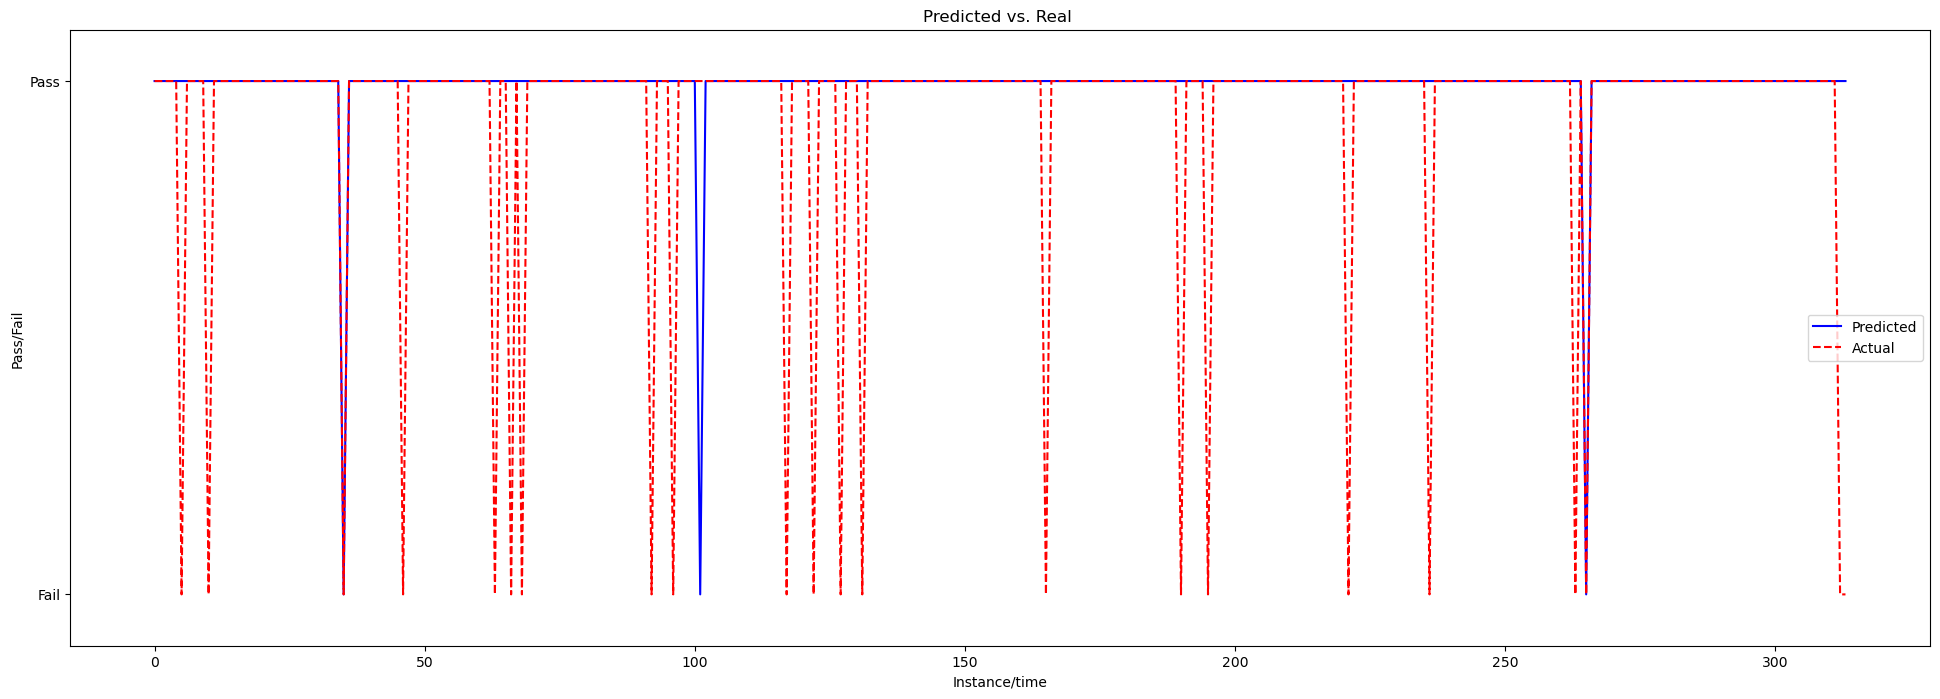

In [46]:
plt.figure(figsize=(24, 8))
plt.title('Predicted vs. Real ')
plt.plot(np.arange(len(y_pred)), y_pred, "b", label="Predicted")
plt.plot(np.arange(len(y_test)), y_test, 'r--', label="Actual")
plt.ylabel('Pass/Fail')
plt.xlabel('Instance/time')
plt.yticks([0, 1], ['Fail', 'Pass'])
plt.legend(loc='best')
plt.ylim(-0.1, 1.1)
plt.rcParams.update({'font.size': 30})
plt.show()

From the graph, we can see that even though we have a majority of successes, the model is failing to capture a majority of the failures in the test cases. This means that even though we do have a high accuracy, we should be aware that the model is not succeeding in capturing failed results.

## Confusion Matrix

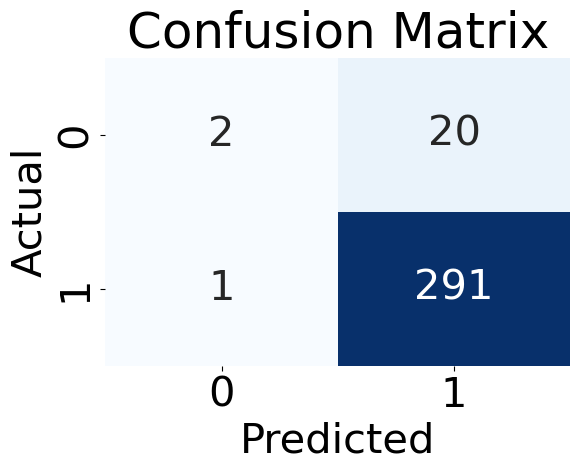

Model Accuracy is= 93.31 %


In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()
print("Model Accuracy is=", round(accuracy_score(y_test, y_pred)*100,2), "%")

Here we see 2 correct instances capturing Failures, 1 false failure, 20 false successes, and 291 correct successes. The model accuracy based on this is about 93.31% as a result.

# ANN Classification

## Building the ANN Model

### Initializing and Layering the ANN

In [189]:
# Initialize
import tensorflow as tf
PassFailModel_1 = tf.keras.models.Sequential()
PassFailModel_2 = tf.keras.models.Sequential()
PassFailModel_3 = tf.keras.models.Sequential()
# Input Layer
PassFailModel_1.add(tf.keras.layers.Dense(units=437, activation='relu'))
PassFailModel_2.add(tf.keras.layers.Dense(units=437, activation='relu'))
PassFailModel_3.add(tf.keras.layers.Dense(units=437, activation='relu'))
# Hidden Layer
PassFailModel_1.add(tf.keras.layers.Dense(units=256, activation='relu'))
PassFailModel_2.add(tf.keras.layers.Dense(units=64, activation='relu'))
PassFailModel_3.add(tf.keras.layers.Dense(units=16, activation='relu'))
PassFailModel_3.add(tf.keras.layers.Dense(units=16, activation='relu'))
# Output Layer
PassFailModel_1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
PassFailModel_2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
PassFailModel_3.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Compiling & Training the ANN

In [192]:
PassFailModel_1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
PassFailModel_2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
PassFailModel_3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
t1 = PassFailModel_1.fit(X_train, y_train, batch_size = 64, epochs = 300)
t2 = PassFailModel_2.fit(X_train, y_train, batch_size = 64, epochs = 300)
t3 = PassFailModel_3.fit(X_train, y_train, batch_size = 64, epochs = 300)

Epoch 1/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7898 - loss: 208.7859
Epoch 2/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8128 - loss: 47.9197
Epoch 3/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8695 - loss: 19.6486
Epoch 4/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8724 - loss: 9.9697 
Epoch 5/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9031 - loss: 3.5588
Epoch 6/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9096 - loss: 4.0772
Epoch 7/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8989 - loss: 5.1638
Epoch 8/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8923 - loss: 4.3696
Epoch 9/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8840 - loss: 2.7461
Epoch 10/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9200 - loss: 5.4647
Epoch 11/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8471 - loss: 8.6514
Epoch 12/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accu

## Evaluating the ANN

In [197]:
print(t1.history.keys())

dict_keys(['accuracy', 'loss'])


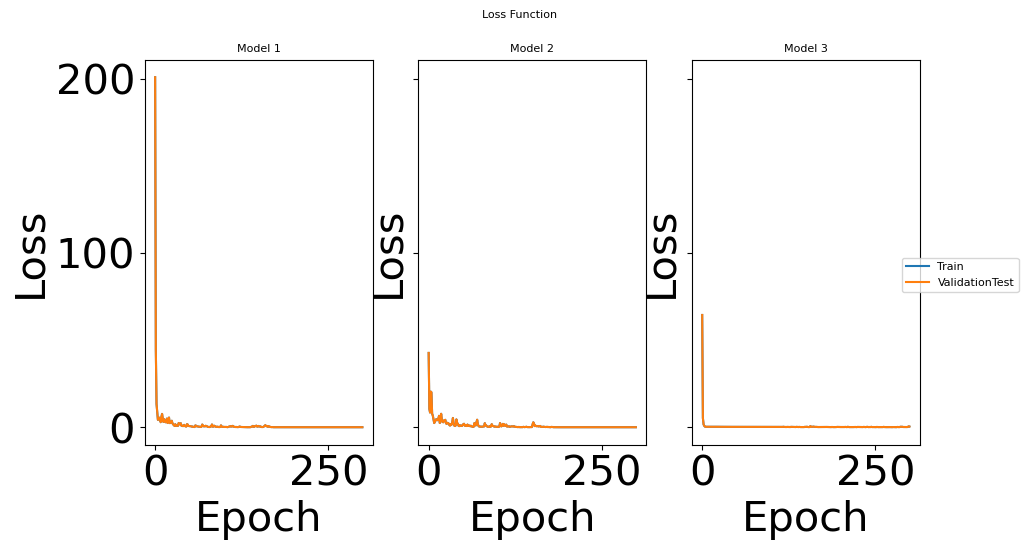

In [257]:
from matplotlib import legend
t = [t1, t2, t3]
fig, axs = plt.subplots(1,3, sharex=True, sharey=True, figsize = (10,5))
fig.suptitle('Loss Function', fontsize = 8)
for i in range(3):
  axs[i].plot(t[i].history['loss'])
  axs[i].plot(t[i].history['loss'])
  axs[i].set_title("Model {}".format(i + 1), fontsize = 8)

for ax in axs.flat:
    ax.set(xlabel='Epoch', ylabel='Loss')

fig.legend(labels=['Train','ValidationTest'], loc="center right", fontsize = 8)
plt.show()

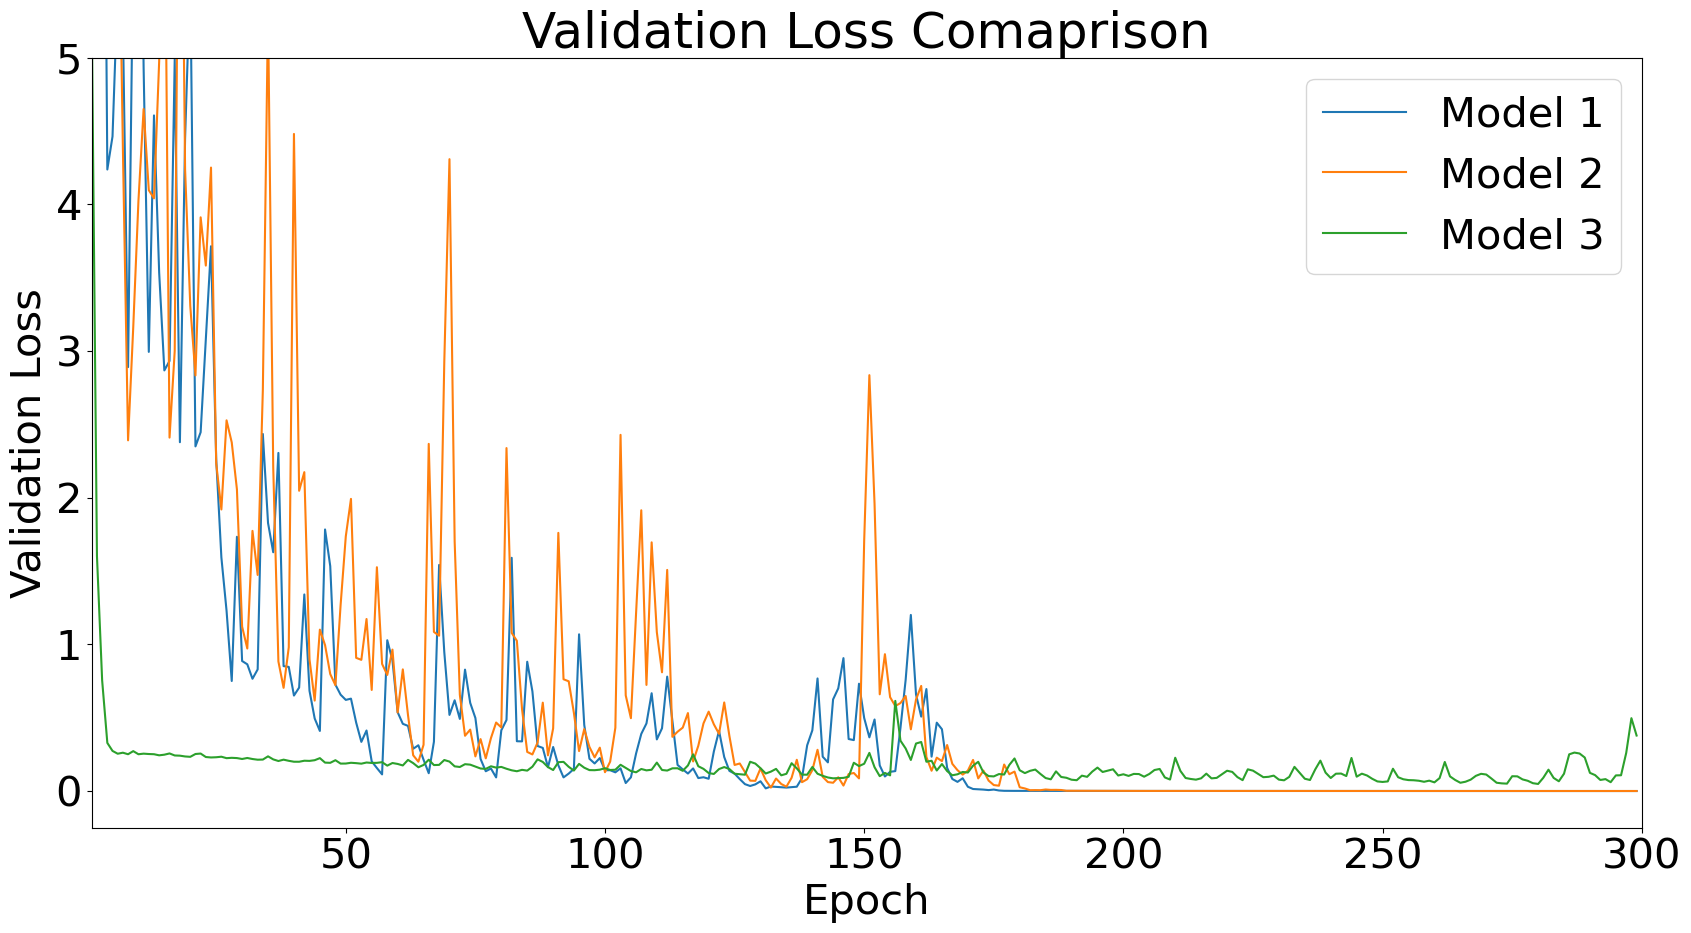

In [233]:
fig, axs = plt.subplots(1,1, sharex=True, sharey=True, figsize = (20,10))
for i in range(3):
  plt.plot(t[i].history['loss'])

plt.title('Validation Loss Comaprison')
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.xlim(1, 300)
plt.ylim(-.25, 5)
plt.legend(['Model 1', 'Model 2', 'Model 3'], loc='upper right')
plt.show()

### Test Set Prediction

In [235]:
y_pred_ANN_1 = PassFailModel_1.predict(X_test)
y_pred_ANN_2 = PassFailModel_2.predict(X_test)
y_pred_ANN_3 = PassFailModel_3.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


### Evaluating the Model

In [237]:
PassFailModel_1.evaluate(X_test,y_test)
PassFailModel_2.evaluate(X_test,y_test)
PassFailModel_3.evaluate(X_test,y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8988 - loss: 2.8703  
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8986 - loss: 3.5778  
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6823 - loss: 1.0032  


[1.003942608833313, 0.7133758068084717]

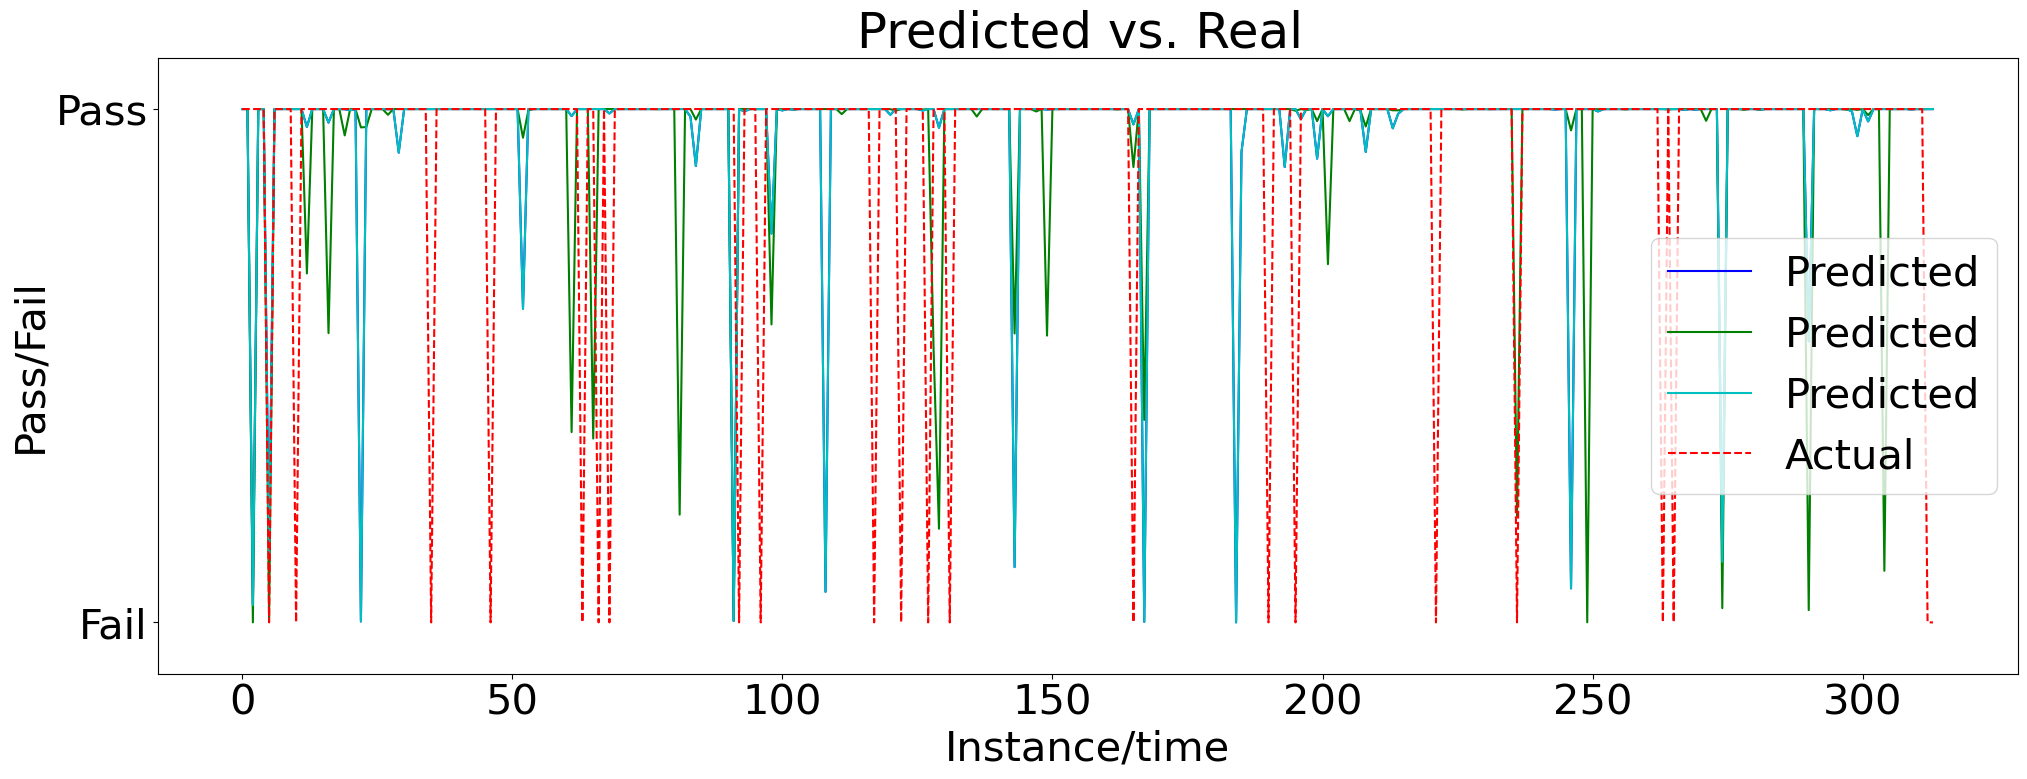

In [239]:
plt.figure(figsize=(24, 8))
plt.title('Predicted vs. Real ')
plt.plot(np.arange(len(y_pred)), y_pred_ANN_1, "b", label="Predicted")
plt.plot(np.arange(len(y_pred)), y_pred_ANN_2, "g", label="Predicted")
plt.plot(np.arange(len(y_pred)), y_pred_ANN_1, "c", label="Predicted")
plt.plot(np.arange(len(y_test)), y_test, 'r--', label="Actual")
plt.ylabel('Pass/Fail')
plt.xlabel('Instance/time')
plt.yticks([0, 1], ['Fail', 'Pass'])
plt.legend(loc='best')
plt.ylim(-0.1, 1.1)
plt.rcParams.update({'font.size': 30})
plt.show()

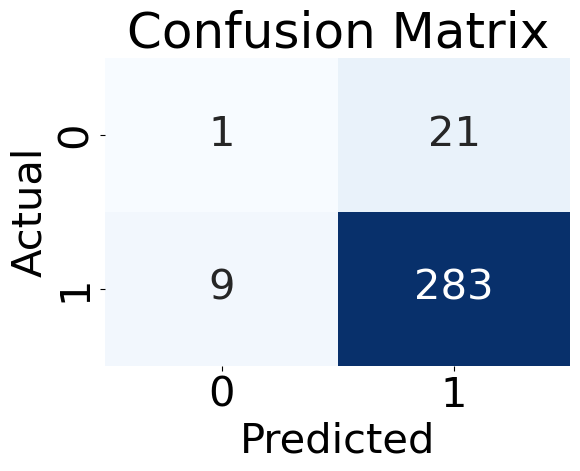

Model Accuracy is= 90.45 %


In [241]:
y_pred_ANN_1 = (y_pred_ANN_1 > 0.5) #Classification metrics can't handle a mix of binary and continuous targets, so we change the target (y_pred) to binary, True/False
cm_ANN = confusion_matrix(y_test, y_pred_ANN_1)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ANN, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()
print("Model Accuracy is=", round(accuracy_score(y_test, y_pred_ANN_1)*100,2), "%")

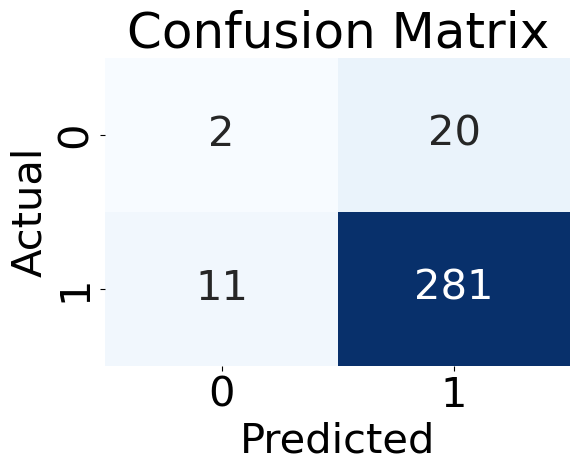

Model Accuracy is= 90.13 %


In [243]:
y_pred_ANN_2 = (y_pred_ANN_2 > 0.5) #Classification metrics can't handle a mix of binary and continuous targets, so we change the target (y_pred) to binary, True/False
cm_ANN_2 = confusion_matrix(y_test, y_pred_ANN_2)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ANN_2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()
print("Model Accuracy is=", round(accuracy_score(y_test, y_pred_ANN_2)*100,2), "%")

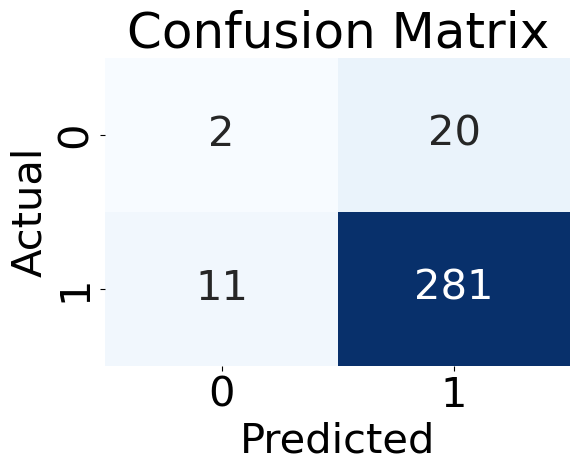

Model Accuracy is= 90.13 %


In [245]:
y_pred_ANN_3 = (y_pred_ANN_2 > 0.5) #Classification metrics can't handle a mix of binary and continuous targets, so we change the target (y_pred) to binary, True/False
cm_ANN_3 = confusion_matrix(y_test, y_pred_ANN_3)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ANN_3, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()
print("Model Accuracy is=", round(accuracy_score(y_test, y_pred_ANN_3)*100,2), "%")

Here we see a similar result to what occurred in the linear regression. Although we have a very high accuracy, the ANN model continued to predict only passes and no failures. 

Adding multiple hidden layers, expanding the nodes in the hidden layers, increasing the batch sizes and epochs slightly improved the overall accuracy of the model.

Noted that lowering the epoch attributed to noise. 